# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
# "https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}"
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    # converted the units to metric (default for temp is in kelvin)
    city_url = url + "q=" + city + "&appid=" + weather_api_key + "&units=metric"

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json() 

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 2 of Set 1 | nikolskoye
Processing Record 3 of Set 1 | upernavik
Processing Record 4 of Set 1 | liverpool
Processing Record 5 of Set 1 | leningradskiy
Processing Record 6 of Set 1 | guinticgan
Processing Record 7 of Set 1 | butaritari
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | jacareacanga
Processing Record 10 of Set 1 | the valley
Processing Record 11 of Set 1 | asau
Processing Record 12 of Set 1 | peleduy
Processing Record 13 of Set 1 | cockburn town
Processing Record 14 of Set 1 | iskateley
Processing Record 15 of Set 1 | barbar
City not found. Skipping...
Processing Record 16 of Set 1 | kapaa
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | fortuna
Processing Record 19 of Set 1 | nishihara
Processing Record 20 of Set 1 | qaanaaq
Processing Record 21 of Set 1 | ribeira grande
Processi

City not found. Skipping...
Processing Record 38 of Set 4 | praya
Processing Record 39 of Set 4 | san fernando
Processing Record 40 of Set 4 | souillac
Processing Record 41 of Set 4 | faya
Processing Record 42 of Set 4 | cordoba
Processing Record 43 of Set 4 | kavieng
Processing Record 44 of Set 4 | koubia
Processing Record 45 of Set 4 | anta
Processing Record 46 of Set 4 | valleyview
Processing Record 47 of Set 4 | vangaindrano
Processing Record 48 of Set 4 | rocha
Processing Record 49 of Set 4 | thompson
Processing Record 0 of Set 5 | olinda
Processing Record 1 of Set 5 | lebu
Processing Record 2 of Set 5 | cassilandia
Processing Record 3 of Set 5 | ayagoz
Processing Record 4 of Set 5 | champerico
Processing Record 5 of Set 5 | yar-sale
Processing Record 6 of Set 5 | hualmay
Processing Record 7 of Set 5 | saryshagan
City not found. Skipping...
Processing Record 8 of Set 5 | armacao dos buzios
City not found. Skipping...
Processing Record 9 of Set 5 | marcona
City not found. Skipping.

Processing Record 21 of Set 8 | pacific grove
Processing Record 22 of Set 8 | mastic beach
Processing Record 23 of Set 8 | vagur
Processing Record 24 of Set 8 | brae
Processing Record 25 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 26 of Set 8 | hambantota
Processing Record 27 of Set 8 | tam ky
Processing Record 28 of Set 8 | vao
Processing Record 29 of Set 8 | andevoranto
City not found. Skipping...
Processing Record 30 of Set 8 | calvia
Processing Record 31 of Set 8 | sorland
Processing Record 32 of Set 8 | antalaha
Processing Record 33 of Set 8 | zhigansk
Processing Record 34 of Set 8 | temiscaming
Processing Record 35 of Set 8 | wendelstein
Processing Record 36 of Set 8 | korla
Processing Record 37 of Set 8 | san cristobal
Processing Record 38 of Set 8 | rawson
Processing Record 39 of Set 8 | kanor
Processing Record 40 of Set 8 | maxixe
Processing Record 41 of Set 8 | khipro
Processing Record 42 of Set 8 | malinyi
Processing Record 43 of Set 8 | kavaratti
Proce

Processing Record 10 of Set 12 | mahibadhoo
Processing Record 11 of Set 12 | vredendal
Processing Record 12 of Set 12 | aquidaba
Processing Record 13 of Set 12 | lomovka
Processing Record 14 of Set 12 | muskegon
Processing Record 15 of Set 12 | miguel hidalgo
Processing Record 16 of Set 12 | malinovoye ozero
Processing Record 17 of Set 12 | aykhal
Processing Record 18 of Set 12 | orje
Processing Record 19 of Set 12 | palmer
Processing Record 20 of Set 12 | kabwe
Processing Record 21 of Set 12 | moussoro
Processing Record 22 of Set 12 | tautira
Processing Record 23 of Set 12 | klyuchi
Processing Record 24 of Set 12 | berbera
Processing Record 25 of Set 12 | tumwater
Processing Record 26 of Set 12 | mancio lima
Processing Record 27 of Set 12 | ulaanbaatar
Processing Record 28 of Set 12 | mandalgovi
Processing Record 29 of Set 12 | margate
Processing Record 30 of Set 12 | andros
Processing Record 31 of Set 12 | swan river
Processing Record 32 of Set 12 | cefalu
Processing Record 33 of Set

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          536
Lat           536
Lng           536
Max Temp      536
Humidity      536
Cloudiness    536
Wind Speed    536
Country       536
Date          536
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nikolskoye,59.7035,30.7861,14.94,64,74,2.06,RU,1681135158
1,upernavik,72.7868,-56.1549,-17.57,97,100,8.13,GL,1681135159
2,liverpool,53.4106,-2.9779,13.41,89,75,6.17,GB,1681135159
3,leningradskiy,69.3833,178.4167,-24.78,95,100,3.27,RU,1681135159
4,guinticgan,11.5641,123.1236,27.07,75,100,5.37,PH,1681135159


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nikolskoye,59.7035,30.7861,14.94,64,74,2.06,RU,1681135158
1,upernavik,72.7868,-56.1549,-17.57,97,100,8.13,GL,1681135159
2,liverpool,53.4106,-2.9779,13.41,89,75,6.17,GB,1681135159
3,leningradskiy,69.3833,178.4167,-24.78,95,100,3.27,RU,1681135159
4,guinticgan,11.5641,123.1236,27.07,75,100,5.37,PH,1681135159


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

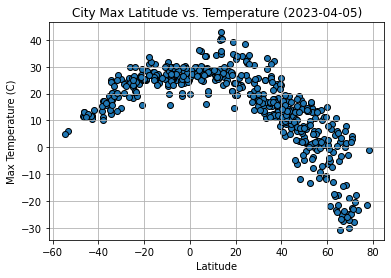

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(x = city_data_df["Lat"], y = city_data_df["Max Temp"], edgecolors='black')

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2023-04-05)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

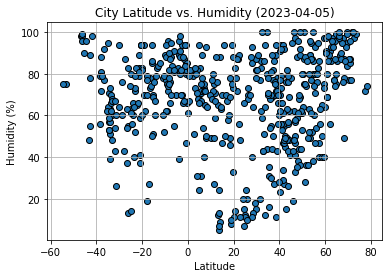

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(x = city_data_df["Lat"], y = city_data_df["Humidity"], edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-04-05)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

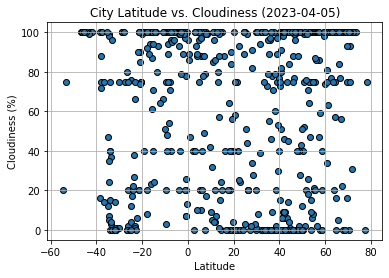

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(x = city_data_df["Lat"], y = city_data_df["Cloudiness"], edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-04-05)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

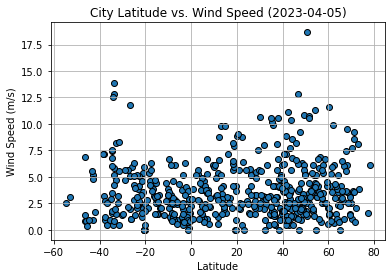

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(x = city_data_df["Lat"], y = city_data_df["Wind Speed"], edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-04-05)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linreg(x_values):
    return slope * x_values + intercept

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0), :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nikolskoye,59.7035,30.7861,14.94,64,74,2.06,RU,1681135158
1,upernavik,72.7868,-56.1549,-17.57,97,100,8.13,GL,1681135159
2,liverpool,53.4106,-2.9779,13.41,89,75,6.17,GB,1681135159
3,leningradskiy,69.3833,178.4167,-24.78,95,100,3.27,RU,1681135159
4,guinticgan,11.5641,123.1236,27.07,75,100,5.37,PH,1681135159


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0), :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
6,rikitea,-23.1203,-134.9692,24.11,72,66,3.82,PF,1681135161
7,jacareacanga,-6.2222,-57.7528,27.61,81,100,0.94,BR,1681135161
14,punta arenas,-53.1500,-70.9167,6.01,75,75,3.09,CL,1681135165
19,ushuaia,-54.8000,-68.3000,4.79,75,20,2.57,AR,1681135167
21,tsabong,-26.0217,22.4010,25.33,13,2,5.90,BW,1681135168


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8451345192394253


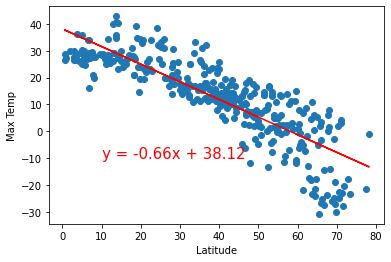

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = linreg(x_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,-10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.7439145074471835


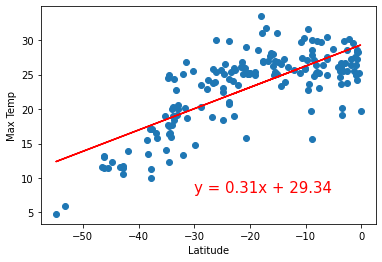

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = linreg(x_values)
line_eq_2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq_2,(-30,8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** The correlation between latitude and maximum temperature was much strong for the northern hemisphere than southern hemisphere. For northern hemisphere, the higher the latitude, the lower the maximum temperature. The reverse is generally true for the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.29912679996569214


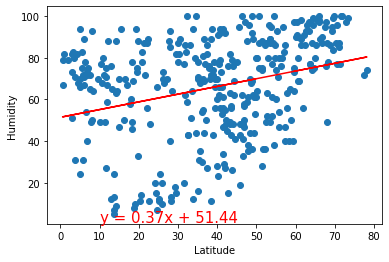

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = linreg(x_values)
line_eq_3 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq_3,(10,1),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.17425466048035895


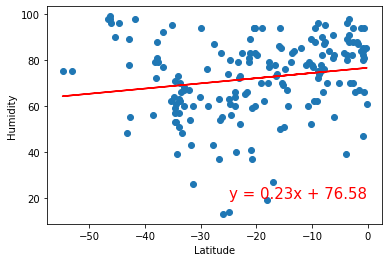

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = linreg(x_values)
line_eq_4 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq_4,(-25,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** Since the r-values are very small for both the northern and southern hemispheres, one may conclude that the correlation between latitude and humidity is weak in both cases.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.10586245627389913


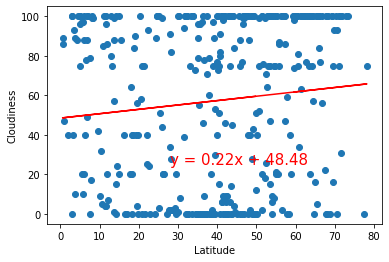

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = linreg(x_values)
line_eq_5 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq_5,(28,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.2178352181401379


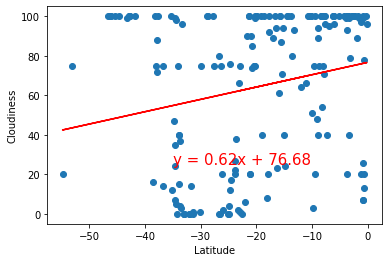

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = linreg(x_values)
line_eq_6 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq_6,(-35,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** There is no significant correlation between the latitude of either northern or southern hemispheres and cloudiness of the weather.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.05643754622791201


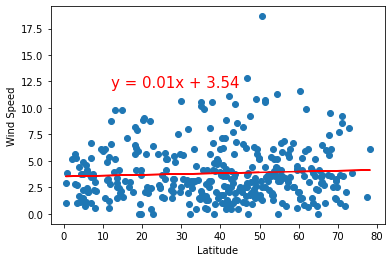

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = linreg(x_values)
line_eq_7 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq_7,(12,12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.2399760181065978


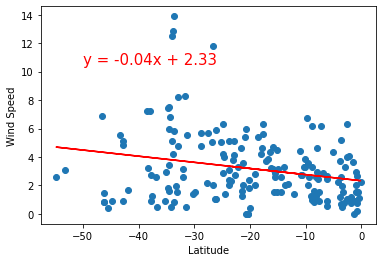

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = linreg(x_values)
line_eq_8 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq_8,(-50,10.5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** There is no strong correlation between the latitude of either northern or southern hemispheres and wind speeds.